In [1]:
import pandas as pd
import numpy as np
import csv
pd.set_option('display.max_columns', 100)

In [2]:
# Read data from CSV
squawka = []
with open('epl-season16-17-week1-33.csv', 'r', errors='ignore') as squawka_csv:
    squawka_reader = csv.reader(squawka_csv)
    for row in squawka_reader:
        squawka.append(row)

# Convert percentage features to decimal
squawka = pd.DataFrame(squawka[1:], columns=squawka[0])
passing = squawka.passing.values
passing = [int(x.replace('%', ''))/100 for x in passing]
tackles = squawka.tackles.values
tackles = [int(x.replace('%', ''))/100 for x in tackles]
aerial_duels = squawka.aerial_duels.values
aerial_duels = [int(x.replace('%', ''))/100 for x in aerial_duels]

squawka = squawka.drop(['passing', 'tackles', 'aerial_duels'], axis=1)
squawka['passing'] = pd.Series(passing, index=squawka.index)
squawka['tackles'] = pd.Series(tackles, index=squawka.index)
squawka['aerial_duels'] = pd.Series(aerial_duels, index=squawka.index)

In [3]:
# Show first 5 rows
squawka.head()

,name,team,match_id,shots,chances,crossing,set_piece,take_ons,interceptions,clearance,fouls,cards,throw_ins,blocks,gk,goal,own_goal,date,stadium,league,did_play,did_start,0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,score,passing,tackles,aerial_duels
0,Aaron Cresswell,WESTHAM,WESTHAMvMANCITY,1,0,2,0,0,3,2,0,0,3,2,0,0,0,01.02.2017,London Stadium,English Premier League,1,1,0,4,7,7,-23,-30,-32,-34,-40,-40,-42,-41,-37,-37,-44,-44,-53,-51,-50,0v4,0.57,0.50,0.43
1,Aaron Cresswell,WESTHAM,B'MOUTHvWESTHAM,0,1,6,0,0,0,2,0,0,8,1,0,0,0,11.03.2017,Vitality Stadium,English Premier League,1,1,0,-9,-12,-14,-16,-16,-28,-36,-32,-31,-38,-38,-37,-31,-31,-31,-30,-32,-38,3v2,0.70,0.50,1.00
2,Aaron Cresswell,WESTHAM,C.PALACEvWESTHAM,1,2,3,0,0,1,2,1,2,4,1,0,0,0,15.10.2016,Selhurst Park,English Premier League,1,1,0,-5,-1,-3,14,13,13,11,12,13,9,9,11,11,11,-35,-35,-35,-35,0v1,0.60,0.00,0.00
3,Aaron Cresswell,WESTHAM,S'HAMPTONvWESTHAM,1,0,5,0,2,2,3,0,1,3,6,0,0,0,04.02.2017,St. Mary's Stadium,English Premier League,1,1,0,12,10,-1,3,2,11,11,13,13,12,14,17,17,10,6,-8,-17,-30,1v3,0.79,0.50,0.50
4,Aaron Cresswell,WESTHAM,WESTHAMvLEICESTER,0,1,6,0,0,0,2,1,0,6,1,0,0,0,18.03.2017,London Stadium,English Premier League,1,1,0,-9,-18,-19,-18,-20,-19,-12,-18,-20,-16,-17,-16,-17,-10,-9,-9,-9,-14,2v3,0.71,0.33,0.67


In [4]:
# 11621 rows/players (with repeats), 45 features
squawka.values.shape

(11621, 45)

In [5]:
from sklearn.preprocessing import Imputer, StandardScaler
from scipy.stats import normaltest
import matplotlib.pyplot as plt

In [6]:
# Replace '?' with 'NaN' for Imputer
squawka = squawka.replace('?', 'NaN')

# Split dataset into following categories
squawka_count = squawka[['shots', 'chances', 'crossing',
                         'set_piece', 'take_ons', 'interceptions',
                         'clearance', 'fouls', 'cards',
                         'throw_ins', 'blocks', 'gk', 'goal',
                         'own_goal']]

squawka_bin = squawka[['did_play', 'did_start']]

squawka_ts = squawka[['0', '5', '10', '15', '20', '25', '30',
                      '35', '40', '45', '50', '55', '60', '65',
                      '70', '75', '80', '85', '90']]

squawka_percent = squawka[['passing', 'tackles', 'aerial_duels']]

squawka_rest = squawka[['name', 'team', 'match_id', 'date', 'stadium',
                        'league', 'score']]

In [7]:
# Imputation
imputer = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)

count_data = imputer.fit_transform(squawka_count.values)
ts_data = imputer.fit_transform(squawka_ts.values)
percent_data = imputer.fit_transform(squawka_percent.values)

squawka_count = pd.DataFrame(count_data, columns=
                            ['shots', 'chances', 'crossing',
                             'set_piece', 'take_ons', 'interceptions',
                             'clearance', 'fouls', 'cards',
                             'throw_ins', 'blocks', 'gk', 'goal',
                             'own_goal'])
squawka_ts = pd.DataFrame(ts_data, columns=
                          ['0', '5', '10', '15', '20', '25', '30',
                          '35', '40', '45', '50', '55', '60', '65',
                          '70', '75', '80', '85', '90'])
squawka_percent = pd.DataFrame(percent_data, columns=
                               ['passing', 'tackles', 'aerial_duels'])

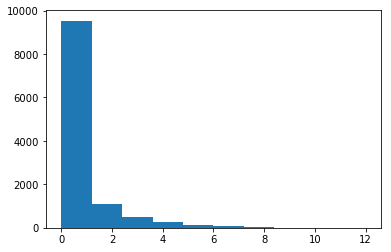

NormaltestResult(statistic=5855.937215336915, pvalue=0.0)


In [8]:
# Check if data is in normal distribution

# Visualize one of the features using histogram and use normaltest
plt.hist(squawka_count.shots.values)
plt.show()
print(normaltest(squawka_count.shots.values))

In [9]:
# Repeat for the rest
print(normaltest(squawka_count.chances.values))
print(normaltest(squawka_count.crossing.values))
print(normaltest(squawka_count.set_piece.values))
print(normaltest(squawka_count.take_ons.values))
print(normaltest(squawka_count.interceptions.values))
print(normaltest(squawka_count.clearance.values))
print(normaltest(squawka_count.fouls.values))
print(normaltest(squawka_count.cards.values))
print(normaltest(squawka_count.throw_ins.values))
print(normaltest(squawka_count['blocks'].values))
print(normaltest(squawka_count.gk.values))
print(normaltest(squawka_count.goal.values))
print(normaltest(squawka_count.own_goal.values))
print()
print(normaltest(squawka_percent.passing.values))
print(normaltest(squawka_percent.tackles.values))
print(normaltest(squawka_percent.aerial_duels.values))
print()
print(normaltest(squawka_ts['0'].values))
print(normaltest(squawka_ts['5'].values))
print(normaltest(squawka_ts['10'].values))
print(normaltest(squawka_ts['15'].values))
print(normaltest(squawka_ts['20'].values))
print(normaltest(squawka_ts['25'].values))
print(normaltest(squawka_ts['30'].values))
print(normaltest(squawka_ts['35'].values))
print(normaltest(squawka_ts['40'].values))
print(normaltest(squawka_ts['45'].values))
print(normaltest(squawka_ts['50'].values))
print(normaltest(squawka_ts['55'].values))
print(normaltest(squawka_ts['60'].values))
print(normaltest(squawka_ts['65'].values))
print(normaltest(squawka_ts['70'].values))
print(normaltest(squawka_ts['75'].values))
print(normaltest(squawka_ts['80'].values))
print(normaltest(squawka_ts['85'].values))
print(normaltest(squawka_ts['90'].values))

NormaltestResult(statistic=6200.0717453810094, pvalue=0.0)
NormaltestResult(statistic=6743.1670461915501, pvalue=0.0)
NormaltestResult(statistic=13816.588830945835, pvalue=0.0)
NormaltestResult(statistic=7173.5379063617211, pvalue=0.0)
NormaltestResult(statistic=4868.7200814425287, pvalue=0.0)
NormaltestResult(statistic=5718.0718781213563, pvalue=0.0)
NormaltestResult(statistic=3760.561854775367, pvalue=0.0)
NormaltestResult(statistic=6130.3599905477895, pvalue=0.0)
NormaltestResult(statistic=7658.739511374758, pvalue=0.0)
NormaltestResult(statistic=3865.3554228802136, pvalue=0.0)
NormaltestResult(statistic=13424.788902692515, pvalue=0.0)
NormaltestResult(statistic=10460.144189107923, pvalue=0.0)
NormaltestResult(statistic=24659.816327659933, pvalue=0.0)

NormaltestResult(statistic=3832.5628422100417, pvalue=0.0)
NormaltestResult(statistic=1968.4282179404629, pvalue=0.0)
NormaltestResult(statistic=1618.6705779560446, pvalue=0.0)

NormaltestResult(statistic=1.0005147511653922, pvalue=0.

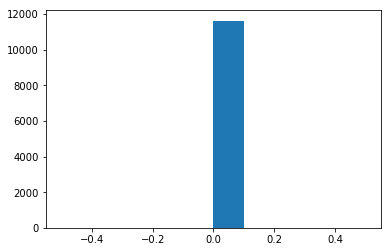

In [10]:
# Check the feature that has p-value of 0.606
plt.hist(squawka_ts['0'].values)
plt.show()

In [11]:
from IPython.display import display

# Create First half, Second half and Full time average ratings
squawka_first_half = squawka_ts[['0', '5', '10', '15', '20', '25',
                                 '30', '35', '40', '45']]
squawka_first_half_avg = pd.DataFrame(squawka_first_half.mean(axis=1),
                                     columns=['first_half_avg'])

squawka_second_half = squawka_ts[['50', '55', '60', '65',
                                  '70', '75', '80', '85', '90']]
squawka_second_half_avg = pd.DataFrame(squawka_second_half.mean(axis=1),
                                     columns=['second_half_avg'])

squawka_full = squawka_ts[['0', '5', '10', '15', '20', '25',
                           '30', '35', '40', '45', '50', '55',
                           '60', '65', '70', '75', '80', '85', '90']]
squawka_full_avg = pd.DataFrame(squawka_full.mean(axis=1),
                                     columns=['full_avg'])

display(squawka_first_half_avg.head())
display(squawka_second_half_avg.head())
display(squawka_full_avg.head())

,first_half_avg
0,-18.1
1,-19.4
2,6.7
3,7.4
4,-15.3


,second_half_avg
0,-44.333333
1,-34.000000
2,-9.888889
3,2.333333
4,-13.000000


,full_avg
0,-30.526316
1,-26.315789
2,-1.157895
3,5.000000
4,-14.210526


In [12]:
# Create new Dataframe for new features
new_squawka = pd.DataFrame(squawka_count.values,
                           index=squawka_rest['name'].values,
                           columns=
                           ['shots', 'chances', 'crossing',
                            'set_piece', 'take_ons', 'interceptions',
                            'clearance', 'fouls', 'cards',
                            'throw_ins', 'blocks', 'gk', 'goal',
                            'own_goal'])
new_squawka['first_half_avg'] = squawka_first_half_avg.values
new_squawka['second_half_avg'] = squawka_second_half_avg.values
new_squawka['passing'] = squawka_percent['passing'].values
new_squawka['tackles'] = squawka_percent['tackles'].values
new_squawka['aerial_duels'] = squawka_percent['aerial_duels'].values
new_squawka['games_played'] = np.ones(squawka.values.shape[0])

In [13]:
new_squawka.head()

,shots,chances,crossing,set_piece,take_ons,interceptions,clearance,fouls,cards,throw_ins,blocks,gk,goal,own_goal,first_half_avg,second_half_avg,passing,tackles,aerial_duels,games_played
Aaron Cresswell,1.0,0.0,2.0,0.0,0.0,3.0,2.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,-18.1,-44.333333,0.57,0.50,0.43,1.0
Aaron Cresswell,0.0,1.0,6.0,0.0,0.0,0.0,2.0,0.0,0.0,8.0,1.0,0.0,0.0,0.0,-19.4,-34.000000,0.70,0.50,1.00,1.0
Aaron Cresswell,1.0,2.0,3.0,0.0,0.0,1.0,2.0,1.0,2.0,4.0,1.0,0.0,0.0,0.0,6.7,-9.888889,0.60,0.00,0.00,1.0
Aaron Cresswell,1.0,0.0,5.0,0.0,2.0,2.0,3.0,0.0,1.0,3.0,6.0,0.0,0.0,0.0,7.4,2.333333,0.79,0.50,0.50,1.0
Aaron Cresswell,0.0,1.0,6.0,0.0,0.0,0.0,2.0,1.0,0.0,6.0,1.0,0.0,0.0,0.0,-15.3,-13.000000,0.71,0.33,0.67,1.0


In [14]:
# Merge stats for same player
squawka_sum = new_squawka.groupby(new_squawka.index).sum()
display(squawka_sum.head())

# Calculate average performance for each player
squawka_avg = squawka_sum.divide(squawka_sum['games_played'],
                                 axis='index').drop('games_played', axis=1)
display(squawka_avg.head())

,shots,chances,crossing,set_piece,take_ons,interceptions,clearance,fouls,cards,throw_ins,blocks,gk,goal,own_goal,first_half_avg,second_half_avg,passing,tackles,aerial_duels,games_played
Aaron Cresswell,10.0,14.0,77.0,0.0,16.0,23.0,71.0,9.0,4.0,142.0,46.0,0.0,0.0,0.0,-36.1,-48.222222,15.66,7.74,10.88,22.0
Aaron Lennon,5.0,6.0,11.0,0.0,5.0,4.0,13.0,1.0,0.0,1.0,12.0,0.0,0.0,0.0,15.4,39.444444,9.12,7.17,0.00,22.0
Aaron Ramsey,29.0,13.0,15.0,0.0,17.0,10.0,10.0,11.0,3.0,7.0,12.0,0.0,0.0,0.0,28.4,120.333333,14.37,2.98,2.67,17.0
Aaron Wan-Bissaka,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.00,0.00,2.0
Abdoulaye Doucour,19.0,5.0,4.0,0.0,6.0,13.0,14.0,6.0,3.0,0.0,10.0,0.0,1.0,0.0,34.7,51.222222,11.50,3.66,4.92,18.0


,shots,chances,crossing,set_piece,take_ons,interceptions,clearance,fouls,cards,throw_ins,blocks,gk,goal,own_goal,first_half_avg,second_half_avg,passing,tackles,aerial_duels
Aaron Cresswell,0.454545,0.636364,3.500000,0.0,0.727273,1.045455,3.227273,0.409091,0.181818,6.454545,2.090909,0.0,0.000000,0.0,-1.640909,-2.191919,0.711818,0.351818,0.494545
Aaron Lennon,0.227273,0.272727,0.500000,0.0,0.227273,0.181818,0.590909,0.045455,0.000000,0.045455,0.545455,0.0,0.000000,0.0,0.700000,1.792929,0.414545,0.325909,0.000000
Aaron Ramsey,1.705882,0.764706,0.882353,0.0,1.000000,0.588235,0.588235,0.647059,0.176471,0.411765,0.705882,0.0,0.000000,0.0,1.670588,7.078431,0.845294,0.175294,0.157059
Aaron Wan-Bissaka,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Abdoulaye Doucour,1.055556,0.277778,0.222222,0.0,0.333333,0.722222,0.777778,0.333333,0.166667,0.000000,0.555556,0.0,0.055556,0.0,1.927778,2.845679,0.638889,0.203333,0.273333


In [15]:
# Perform normaltest again on new data
print(normaltest(squawka_avg.shots.values))
print(normaltest(squawka_avg.chances.values))
print(normaltest(squawka_avg.crossing.values))
print(normaltest(squawka_avg.set_piece.values))
print(normaltest(squawka_avg.take_ons.values))
print(normaltest(squawka_avg.interceptions.values))
print(normaltest(squawka_avg.clearance.values))
print(normaltest(squawka_avg.fouls.values))
print(normaltest(squawka_avg.cards.values))
print(normaltest(squawka_avg.throw_ins.values))
print(normaltest(squawka_avg['blocks'].values))
print(normaltest(squawka_avg.gk.values))
print(normaltest(squawka_avg.goal.values))
print(normaltest(squawka_avg.own_goal.values))
print()
print(normaltest(squawka_avg.first_half_avg.values))
print(normaltest(squawka_avg.second_half_avg.values))
print()
print(normaltest(squawka_avg.passing.values))
print(normaltest(squawka_avg.tackles.values))
print(normaltest(squawka_avg.aerial_duels.values))

NormaltestResult(statistic=239.62350684518995, pvalue=9.2558566830388956e-53)
NormaltestResult(statistic=255.7952494925114, pvalue=2.8494912267390816e-56)
NormaltestResult(statistic=331.65909956741854, pvalue=9.5750619484334656e-73)
NormaltestResult(statistic=383.58108465541227, pvalue=5.086578905157099e-84)
NormaltestResult(statistic=321.21172089814081, pvalue=1.7773012471833383e-70)
NormaltestResult(statistic=106.97183382014128, pvalue=5.9069245885376057e-24)
NormaltestResult(statistic=222.68654751542081, pvalue=4.4078885986726628e-49)
NormaltestResult(statistic=148.06542678637351, pvalue=7.046948425111591e-33)
NormaltestResult(statistic=388.69084838238518, pvalue=3.9523435757926581e-85)
NormaltestResult(statistic=362.68860543384955, pvalue=1.7505318037094577e-79)
NormaltestResult(statistic=50.410886573540061, pvalue=1.1308762064188907e-11)
NormaltestResult(statistic=664.64828348764729, pvalue=4.7147539976506646e-145)
NormaltestResult(statistic=434.86005059809708, pvalue=3.7268319715

In [19]:
# The distribution of the features became more Gaussian,
# but nowhere near the degree that is suitable for standardization.
# Min-max scaling might be a better choice.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

squawka_avg_scaled = squawka_avg
squawka_avg_scaled[:] = scaler.fit_transform(squawka_avg_scaled.values)

In [20]:
squawka_avg_scaled.head()

,shots,chances,crossing,set_piece,take_ons,interceptions,clearance,fouls,cards,throw_ins,blocks,gk,goal,own_goal,first_half_avg,second_half_avg,passing,tackles,aerial_duels
Aaron Cresswell,0.103668,0.173554,0.318182,0.0,0.101399,0.298701,0.331776,0.102273,0.181818,0.683422,0.696970,0.0,0.000000,0.0,0.463945,0.376180,0.778795,0.562909,0.494545
Aaron Lennon,0.051834,0.074380,0.045455,0.0,0.031687,0.051948,0.060748,0.011364,0.000000,0.004813,0.181818,0.0,0.000000,0.0,0.539580,0.430086,0.453551,0.521455,0.000000
Aaron Ramsey,0.389061,0.208556,0.080214,0.0,0.139423,0.168067,0.060473,0.161765,0.176471,0.043599,0.235294,0.0,0.000000,0.0,0.570940,0.501587,0.924829,0.280471,0.157059
Aaron Wan-Bissaka,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.516963,0.405832,0.000000,0.000000,0.000000
Abdoulaye Doucour,0.240741,0.075758,0.020202,0.0,0.046474,0.206349,0.079958,0.083333,0.166667,0.000000,0.185185,0.0,0.066667,0.0,0.579250,0.444328,0.699003,0.325333,0.273333


/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


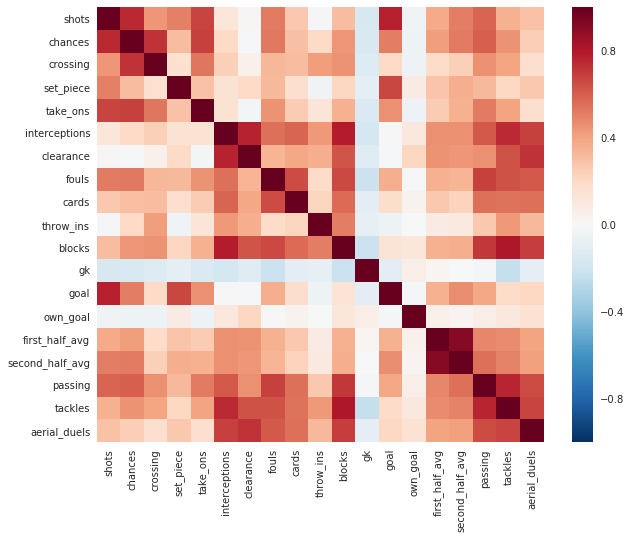

In [29]:
# Compute pairwise correlation of columns

import seaborn as sns
%matplotlib inline 

plt.subplots(figsize=(10, 8))
corrmat = squawka_avg_scaled.corr()
sns.heatmap(corrmat)

In [33]:
# Many of the variables are correlated. It may be useful to perform PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca.fit(squawka_avg_scaled.values)
print(pca.explained_variance_ratio_)
print()
print('The first 5 principal components explain:')
print(sum(pca.explained_variance_ratio_), 'of total variance')

[ 0.52028934  0.14352465  0.07302293  0.04834435  0.03496425]

The first 5 principal components explain:
0.820145530535 of total variance


/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


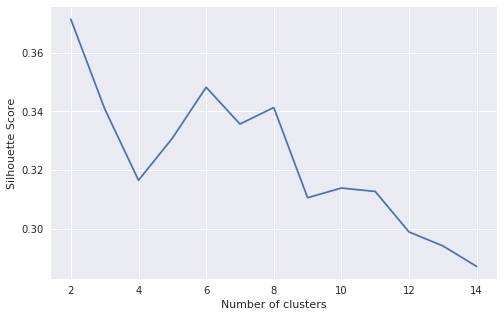

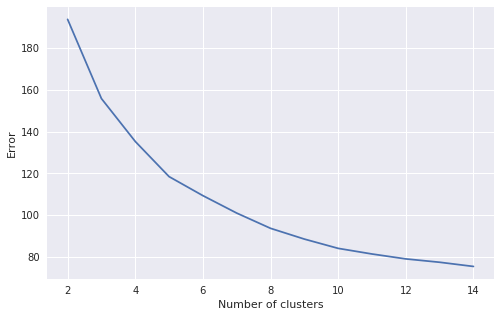

In [74]:
# Cluster without using PCA

from sklearn.cluster import KMeans
from sklearn import metrics

# K-means++

# Determine number of clusters using Silhouette Score
def kmeans_silhouette_eval(X, max_clusters):
    s = np.zeros(max_clusters + 1)
    s[0] = 0
    s[1] = 0
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(init='k-means++', n_clusters=k)
        labels = kmeans.fit_predict(X)
        s[k] = metrics.silhouette_score(X, labels, metric='euclidean')
    plt.plot(range(2, len(s)), s[2:])
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    
# Determine number of clusters using error function
def kmeans_error_eval(X, max_clusters):
    error = np.zeros(max_clusters + 1)
    error[0] = 0
    error[1] = 0
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(init='k-means++', n_clusters=k)
        kmeans.fit_predict(X)
        error[k] = kmeans.inertia_
    plt.plot(range(2, len(error)), error[2:])
    plt.xlabel('Number of clusters')
    plt.ylabel('Error')
    
squawka_X = squawka_avg_scaled.drop(['first_half_avg', 'second_half_avg'], axis=1).values

plt.figure(figsize=(8, 5))
kmeans_silhouette_eval(squawka_X, 14)
plt.figure(figsize=(8, 5))
kmeans_error_eval(squawka_X, 14)

In [75]:
# Use 5 clusters based on the resuls above
# The point of clustering here is to hopefully find players
# who play in the similar position/ have similar playing styles

from collections import defaultdict

kmeans = KMeans(n_clusters=6).fit(squawka_X)

# See what players are in each cluster

cluster_dict = defaultdict(list)
for cluster_label, ind in zip(kmeans.labels_, range(len(kmeans.labels_))):
    cluster_dict[cluster_label].append(squawka_avg_scaled.axes[0][ind])

cluster_dict

defaultdict(list,
            {0: ['Aaron Wan-Bissaka',
              'Adam Federici',
              'Adam Reach',
              'Adrian Mariappa',
              'Adrin',
              "Aiden O'Neill",
              'Ainsley Maitland-Niles',
              'Alberto Moreno',
              'Aleix Garc_a',
              'Alex Baptiste',
              'Alex McCarthy',
              'Alex Palmer',
              'Alex Pike',
              'Alexander Manninger',
              'Andrew Eleftheriou',
              'Ashley Fletcher',
              'Ashley Westwood',
              'Asmir Begovic',
              'Axel Tuanzebe',
              'Baily Cargill',
              'Bartosz Kapustka',
              'Bastian Schweinsteiger',
              'Ben Hamer',
              'Ben Hinchcliffe',
              'Ben Watson',
              'Ben Woodburn',
              'Ben Wynter',
              'Boaz Myhill',
              'Brad Guzan',
              'Brad Smith',
              'Brandon Mason',
          

In [76]:
# Investigate the most influential features for each cluster

desc_order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
features = squawka_avg_scaled.drop(['first_half_avg', 'second_half_avg'], axis=1).axes[1]

for i in range(6):
    print("Cluster {}:".format(i))
    for ind in desc_order_centroids[i, :]:
        print(' {}'.format(features[ind]))
    print()

Cluster 0:
 passing
 tackles
 aerial_duels
 blocks
 fouls
 interceptions
 clearance
 cards
 gk
 chances
 shots
 throw_ins
 take_ons
 crossing
 own_goal
 set_piece
 goal

Cluster 1:
 passing
 tackles
 interceptions
 aerial_duels
 blocks
 clearance
 fouls
 cards
 shots
 set_piece
 chances
 take_ons
 own_goal
 goal
 crossing
 throw_ins
 gk

Cluster 2:
 passing
 throw_ins
 tackles
 blocks
 interceptions
 aerial_duels
 clearance
 crossing
 fouls
 chances
 cards
 take_ons
 shots
 set_piece
 goal
 own_goal
 gk

Cluster 3:
 passing
 shots
 tackles
 chances
 take_ons
 goal
 blocks
 set_piece
 aerial_duels
 fouls
 crossing
 interceptions
 cards
 clearance
 throw_ins
 own_goal
 gk

Cluster 4:
 passing
 tackles
 aerial_duels
 blocks
 interceptions
 shots
 fouls
 take_ons
 chances
 clearance
 crossing
 cards
 goal
 throw_ins
 set_piece
 own_goal
 gk

Cluster 5:
 gk
 passing
 aerial_duels
 own_goal
 cards
 clearance
 tackles
 interceptions
 fouls
 take_ons
 blocks
 chances
 shots
 throw_ins
 crossin